In [2]:
#Nicole Zawadzki
#ASTR400b Project
#April 10th
#Plot the density profile for M33
#No more test, this is the real deal

In [3]:
#import modules
import numpy as np
import astropy.units as u

#import plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [4]:
#import relevant files
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassDistribution import MassProfile

In [60]:
#function that find the density of M33 at a radius
def DensityProfile(galaxy, snap, R):
    #input: galaxy name, snapshot, and raduis array 
    #return: array of densities at each r in inupt array
    
    #reconstruct file
    #add string of the filenumber to find value "000"
    ilbl = '000' + str(snap)
    #remove all but the last 3 digits
    ilbl = ilbl[-3:]
    filename = "%s_"%(galaxy) + ilbl + '.txt'

    #read in data from ReadFile
    time, total, data = Read(filename)
    
    #index for disk particles
    ptype = np.where(data['type'] == 2)
    
    #store position and mass from ReadFile for disk particles
    x = data['x'][ptype]
    y = data['y'][ptype]
    z = data['z'][ptype]
    m = data['m'][ptype]*1e10
    
    #create Center of Mass object for disk particles
    COM = CenterOfMass(filename,2)
    COMP = COM.COM_P(1.0,4.0)
    
    #mass profile object
    Profile = MassProfile(galaxy,snap)
    DiskMass = Profile.MassEnclosed(2,R)
    
    #find position relative to COM
    x2 = x - COMP[0]
    y2 = y - COMP[1]
    z2 = z - COMP[2]
    r = np.sqrt(x2**2 + y2**2 + z2**2)
    #print len(r)
    #print r
    #define density array
    density = np.zeros(shape=len(R))
    
    #loop over radius array to find density at certain radius
    for radius in range(len(R)):
        #finding the volume at radius
        vol = ((4.0/3.0)*np.pi*R[radius]**3)
        #find and store particle masses within given radius
        index = np.where(r<R[radius])
        #print R[radius]
        #print np.shape(index)
        density[radius] = np.sum(m[index])/vol
        
    return density*u.Msun/u.kpc
      

In [61]:
#find snapshots calculate the density at
#use apocenter and pericenter of M33 orbit around M31
#adapting code from bonus question in homework 6

#read in orbit text file
fM33 = np.genfromtxt('SnapData_M33.txt', dtype=None, names=True)
fM31 = np.genfromtxt('SnapData_M31.txt', dtype=None, names=True)
t = fM33['t']
snap = fM33['snap']

#find separation between M33 and M31
xsep = abs(fM31['x'] - fM33['x'])
ysep = abs(fM31['y'] - fM33['y'])
zsep = abs(fM31['z'] - fM33['z'])
rsep = np.sqrt(xsep**2 + ysep**2 + zsep**2)

#define array to store desired times
time_array = []

#indexing time after 6 Gyr
#ind = np.where(time>6)
#using index for separation array
#rnew = r[ind]
#timenew = time[ind]

#loop over r separation to find apocenters and pericenters
for i in range(len(rsep)):
    #if the middle separation is the greatest, this is the apocenter, and print the time and position
    try: 
        if rsep[i-2]<rsep[i-1] and rsep[i-1]>rsep[i]:
            #print 'position:', rnew[i-1], 'time:', timenew[i-1]
            time_array.append(t[i])
        elif rsep[i-2]>rsep[i-1] and rsep[i-1]<rsep[i]:
            time_array.append(t[i])
        else:
            a=0 #else do nothing
    except: 
        a=0

time_array = np.round_(time_array,4)
print time_array

#finding relationship between snap and time
#m = (t[150]-t[5])/(snap[150]-snap[5])
#print m

#snapshot = time_array/m
#print snapshot

[  0.     0.07   1.     2.79   4.36   5.5    6.86   7.57   8.36   9.     9.64
  10.14  10.64  11.14]
0.014275862069
[   0.            4.90338164   70.04830918  195.43478261  305.41062802
  385.26570048  480.53140097  530.26570048  585.60386473  630.43478261
  675.26570048  710.28985507  745.31400966  780.33816425]


In [62]:
#finding the snapshots I need to plot the density profiles at the apo/pericenters
shot = np.zeros(shape=len(time_array))
for i in range(len(time_array)):
    ind = np.where(t==time_array[i])
    shot[i] = snap[ind]

print shot    

[   0.    5.   70.  195.  305.  385.  480.  530.  585.  630.  675.  710.
  745.  780.]


In [75]:
R = np.logspace(-1,1.477,100)

M33density1 = DensityProfile('M33', 0, R)
M33density2 = DensityProfile('M33', 5, R)
M33density3 = DensityProfile('M33', 70, R)
M33density4 = DensityProfile('M33', 195, R)
M33density5 = DensityProfile('M33', 305, R)
M33density6 = DensityProfile('M33', 385, R)
M33density7 = DensityProfile('M33', 480, R)
M33density8 = DensityProfile('M33', 530, R)
M33density9 = DensityProfile('M33', 585, R)
M33density10 = DensityProfile('M33', 630, R)
M33density11 = DensityProfile('M33', 675, R)
M33density12 = DensityProfile('M33', 710, R)
M33density13 = DensityProfile('M33', 745, R)
M33density14 = DensityProfile('M33', 780, R)

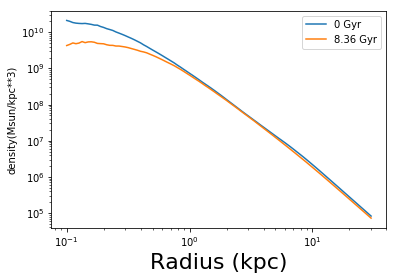

In [77]:
fig = plt.figure()
ax = plt.subplot(111)
plt.semilogy(R,M33density1, label='0 Gyr')
#plt.semilogy(R,M33density2, label='0.07 Gyr')
#plt.semilogy(R,M33density3, label='1 Gyr')
#plt.semilogy(R,M33density4, label='2.79 Gyr')
#plt.semilogy(R,M33density5, label='4.36 Gyr')
#plt.semilogy(R,M33density6, label='5.5 Gyr')
#plt.semilogy(R,M33density7, label='6.86 Gyr')
#plt.semilogy(R,M33density8, label='7.57 Gyr')
plt.semilogy(R,M33density9, label='8.36 Gyr')
#plt.semilogy(R,M33density10, label='9 Gyr')
#plt.semilogy(R,M33density11, label='9.64 Gyr')
#plt.semilogy(R,M33density12, label='10.14 Gyr')
#plt.semilogy(R,M33density13, label='10.96 Gyr')
#plt.semilogy(R,M33density14, label='11.14 Gyr')
plt.xlabel('Radius (kpc)', fontsize=22)
plt.xscale('log')
plt.ylabel('density(Msun/kpc**3)')
legend = ax.legend()